Experiment 1: Effect of Node Fan-out, Figure 13

In [ ]:
import os
import subprocess
import re

range1 = [8, 12]
range2 = [16, 20, 24, 28, 32, 36, 40]
for num in range1: # contain spp
    break
    print("num = ", num)
    backUpFileName = 'include/btree/backup_common.cuh'
    fileName = 'include/btree/common.cuh'
    subprocess.run(f"sed 's/MACRO_MAX_ENTRIES 14/MACRO_MAX_ENTRIES {num}/g' {backUpFileName} > {fileName}", shell=True, check=True)

    subprocess.run("cd build/ && taskset -c 0 make", shell=True, check=True)
    subprocess.run("cd ..", shell=True, check=True)
    for i in range(4):
        subprocess.run(f"N=268435456 GS=144 BS=128 taskset -c 0 ./build/btree > B_{num}_{i}_date0314.res", shell=True)

for num in range2:
    backUpFileName = 'include/btree/backup_common.cuh'
    fileName = 'include/btree/common.cuh'
    subprocess.run(f"sed 's/MACRO_MAX_ENTRIES [0-9][0-9]/MACRO_MAX_ENTRIES {num}/g' {backUpFileName} > {fileName}", shell=True, check=True)

    subprocess.run("cd build/ && taskset -c 0 make", shell=True, check=True)
    subprocess.run("cd ..", shell=True, check=True)
    for i in range(4):
         subprocess.run(f"N=268435456 GS=144 BS=128 taskset -c 0 ./build/btree > B_{num}_{i}_date0314.res", shell=True)

# N=134217728 GS=144 BS=128 taskset -c 0 ./build/btree --gtest_filter='*naive*'
        
# 18

In [22]:

import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
import re

rg = range(8, 8 + 4 * 9, 4)
idx = {}
c = 0
for i in rg:
    idx[i] = c
    c += 1

baseline = [[] for _ in range(9)]
gp = [[] for _ in range(9)]
spp = [[] for _ in range(2)]
amac = [[] for _ in range(9)]
imv = [[] for _ in range(9)]

name = 'B'

for file_path in glob.glob( name + '*.res'):
    if True:
        print(file_path, end=':\n')
        f = open(file_path, "r")
        o = int(file_path.split('.res')[0].split('_')[1])
        if o not in idx.keys():
            continue
        id = idx[o]
        test = file_path.split('.res')[0].split('_')[2]
        ms = []
        while True:
            a = f.readline()
            tmp = a
            if not a:
                break
            a = a.split(',')
            if len(a) >= 2 and 'probe(S)' in a[0]:
                a = tmp.split('ms')[1].split(' tps ')[0].split(', ')[1]
                # print('\t', a)
                ms.append( float(a) )
        if len(ms) == 5:
            baseline[id].append(ms[0])
            gp[id].append(ms[1])
            spp[id].append(ms[2])
            amac[id].append(ms[3])
            imv[id].append(ms[4])
        if len(ms) == 4:
            baseline[id].append(ms[0])
            gp[id].append(ms[1])
            amac[id].append(ms[2])
            imv[id].append(ms[3])

data_baseline = [np.mean(baseline[i]) for i in range(9)]
data_gp = [np.mean(gp[i]) for i in range(9)]
data_spp = [np.mean(spp[i]) for i in range(2)]
data_amac = [np.mean(amac[i]) for i in range(9)]
data_imv = [np.mean(imv[i]) for i in range(9)]

source["x"] = rg
source["y"][0] = data_baseline
source["y"][1] = data_gp
source["y"][2] = data_spp
source["y"][3] = data_amac
source["y"][4] = data_imv
source["legends"] = [0, 1, 2, 3, 4]
source["legend_names"] = {
    0: "baseline",
    1: "GP",
    2: "SPP",
    3: "AMAC",
    4: "IMV"
}
source

B_24_1_date0314.res:
B_28_2_date0314.res:
B_36_0_date0314.res:
B_40_2_date0314.res:
B_24_2_date0314.res:
B_28_3_date0314.res:
B_36_1_date0314.res:
B_40_3_date0314.res:
B_20_0_date0314.res:
B_20_2_date0314.res:
B_24_3_date0314.res:
B_32_0_date0314.res:
B_36_2_date0314.res:
B_20_3_date0314.res:
B_28_0_date0314.res:
B_32_1_date0314.res:
B_36_3_date0314.res:
B_8_0_date0314.res:
B_8_1_date0314.res:
B_8_2_date0314.res:
B_8_3_date0314.res:
B_12_0_date0314.res:
B_12_1_date0314.res:
B_12_2_date0314.res:
B_12_3_date0314.res:
B_16_0_date0314.res:
B_16_1_date0314.res:
B_16_2_date0314.res:
B_16_3_date0314.res:
B_20_1_date0314.res:
B_24_0_date0314.res:
B_28_1_date0314.res:
B_32_2_date0314.res:
B_40_0_date0314.res:
B_32_3_date0314.res:
B_40_1_date0314.res:


{'x': range(8, 44, 4),
 'y': {0: [231374733.74254438,
   263654655.68588686,
   278505049.8357303,
   287984865.275099,
   295407551.90954804,
   298094919.8913576,
   298039711.4525305,
   299550110.6123849,
   301335900.46724176],
  1: [331745501.72981673,
   338118856.2591471,
   334759339.2642035,
   327068357.6848767,
   326106612.37610024,
   288006994.2947086,
   252114467.0276238,
   246682023.0381326,
   227775044.80060083],
  2: [321104156.18176264, 340621130.43089676],
  3: [318323133.56042284,
   324728988.17454183,
   322734342.5653401,
   319939314.64518297,
   318632421.8197602,
   277731880.7905417,
   234196434.89504346,
   217285382.04787335,
   196331513.04935506],
  4: [291685030.57935447,
   301644452.80065405,
   306177547.75822294,
   306177502.16977954,
   309336186.03628296,
   279877571.5441694,
   240412758.39557362,
   227211645.40272,
   203897068.6669451]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'baseline', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'

In [6]:
source = {'x': range(8, 44, 4),
 'y': {0: [231374733.74254438,
   263654655.68588686,
   278505049.8357303,
   287984865.275099,
   295407551.90954804,
   298094919.8913576,
   298039711.4525305,
   299550110.6123849,
   301335900.46724176],
  1: [331745501.72981673,
   338118856.2591471,
   334759339.2642035,
   327068357.6848767,
   326106612.37610024,
   288006994.2947086,
   252114467.0276238,
   246682023.0381326,
   227775044.80060083],
  2: [321104156.18176264, 340621130.43089676],
  3: [318323133.56042284,
   324728988.17454183,
   322734342.5653401,
   319939314.64518297,
   318632421.8197602,
   277731880.7905417,
   234196434.89504346,
   217285382.04787335,
   196331513.04935506],
  4: [291685030.57935447,
   301644452.80065405,
   306177547.75822294,
   306177502.16977954,
   309336186.03628296,
   279877571.5441694,
   240412758.39557362,
   227211645.40272,
   203897068.6669451]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'baseline', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}}

Experiment 2:
Figure 17 Impact of Kernel Parameters for BTree Search, (b)
fix GS = 72, BS = 64 ~ 512 (delta = 64)

In [23]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
import re

rg = range(64, 512+1, 64)
idx = {}
c = 0
for i in rg:
    idx[i] = c
    c += 1

baseline = [[] for _ in range(c)]
gp = [[] for _ in range(c)]
spp = [[] for _ in range(2)]
amac = [[] for _ in range(c)]
imv = [[] for _ in range(c)]

name = 'C'

for file_path in glob.glob(name + '*.res'):
    if True:
        print(file_path, end=':\n')
        f = open(file_path, "r")
        o = int(file_path.split('.res')[0].split('_')[2])
        if o not in idx.keys():
            continue
        id = idx[o]
        test = file_path.split('.res')[0].split('_')[2]
        ms = []
        while True:
            a = f.readline()
            tmp = a
            if not a:
                break
            a = a.split(',')
            if len(a) >= 2 and 'probe(S)' in a[0]:
                a = tmp.split('ms')[1].split(' tps ')[0].split(', ')[1]
                # print('\t', a)
                ms.append( float(a) )
        if len(ms) == 4:
            baseline[id].append(ms[0])
            gp[id].append(ms[1])
            amac[id].append(ms[2])
            imv[id].append(ms[3])
        if len(ms) == 1:
            spp[id].append(ms[0])

data_baseline = [np.mean(baseline[i]) for i in range(c)]
data_gp = [np.mean(gp[i]) for i in range(c)]
data_spp = [np.mean(spp[i]) for i in range(2)]
data_amac = [np.mean(amac[i]) for i in range(c)]
data_imv = [np.mean(imv[i]) for i in range(c)]

source = {"x":[], "y":{}}
source["x"] = rg
source["y"][0] = data_baseline
source["y"][1] = data_gp
source["y"][2] = data_spp
source["y"][3] = data_amac
source["y"][4] = data_imv
source["legends"] = [0, 1, 2, 3, 4]
source["legend_names"] = {
    0: "BL",
    1: "GP",
    2: "SPP",
    3: "AMAC",
    4: "IMV"
}
source

C_72_512_2_date0313.res:
C_72_192_2_date0313.res:
C_72_320_1_date0313.res:
C_72_448_0_date0313.res:
C_72_128_0_date0313.res:
C_72_192_3_date0313.res:
C_72_320_2_date0313.res:
C_72_448_1_date0313.res:
C_72_128_1_date0313.res:
C_72_256_0_date0313.res:
C_72_320_3_date0313.res:
C_72_448_2_date0313.res:
C_72_64_0_date0313.res:
C_72_128_2_date0313.res:
C_72_256_1_date0313.res:
C_72_384_0_date0313.res:
C_72_448_3_date0313.res:
C_72_64_3_date0313.res:
C_72_192_1_date0313.res:
C_72_320_0_date0313.res:
C_72_384_3_date0313.res:
C_72_512_3_date0313.res:
C_72_64_1_date0313.res:
C_72_128_3_date0313.res:
C_72_256_2_date0313.res:
C_72_384_1_date0313.res:
C_72_512_0_date0313.res:
C_72_64_2_date0313.res:
C_72_192_0_date0313.res:
C_72_256_3_date0313.res:
C_72_384_2_date0313.res:
C_72_512_1_date0313.res:
Cspp_72_128_0_date0314.res:
Cspp_72_128_1_date0314.res:
Cspp_72_128_2_date0314.res:
Cspp_72_64_0_date0314.res:
Cspp_72_64_1_date0314.res:
Cspp_72_64_2_date0314.res:
Cspp_72_64_3_date0314.res:
Cspp_72_128_

{'x': range(64, 513, 64),
 'y': {0: [270458441.2381004,
   270931741.02800703,
   270620838.9252999,
   270657063.6893082,
   270643796.7780442,
   270198623.9280901,
   270623402.0317428,
   270417094.37671304],
  1: [98939762.30676283,
   192904477.60582376,
   274250528.68620354,
   339973598.778032,
   357718690.0946853,
   278061882.5698684,
   278309607.4621233,
   232958504.67922217],
  2: [104044429.7842921, 204847763.01179627],
  3: [100084682.32573517,
   196136912.98213995,
   271236405.0162931,
   336787275.040123,
   350560754.49529237,
   326679643.75503695,
   278568173.5708823,
   236852824.09454805],
  4: [91736104.01958384,
   179027886.5040924,
   248884883.31824806,
   312184508.11425525,
   343584656.5532154,
   331210539.39193344,
   295885019.5922836,
   256981573.03302056]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'BL', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}}

In [ ]:
# Note: 0, 270568875.2494132, as a line
source = {'x': range(64, 513, 64),
 'y': {0: [270458441.2381004,
   270931741.02800703,
   270620838.9252999,
   270657063.6893082,
   270643796.7780442,
   270198623.9280901,
   270623402.0317428,
   270417094.37671304],
  1: [98939762.30676283,
   192904477.60582376,
   274250528.68620354,
   339973598.778032,
   357718690.0946853,
   278061882.5698684,
   278309607.4621233,
   232958504.67922217],
  2: [104044429.7842921, 204847763.01179627],
  3: [100084682.32573517,
   196136912.98213995,
   271236405.0162931,
   336787275.040123,
   350560754.49529237,
   326679643.75503695,
   278568173.5708823,
   236852824.09454805],
  4: [91736104.01958384,
   179027886.5040924,
   248884883.31824806,
   312184508.11425525,
   343584656.5532154,
   331210539.39193344,
   295885019.5922836,
   256981573.03302056]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'baseline', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}
}

Experiment 3:
Impact of Kernel Parameters for BTree Search (a)
BS = 128, GS in range(36, 36*8+1, 36)

In [12]:
import os
import subprocess
import re

BS = 128
backUpFileName = 'include/btree/backup_common.cuh'
fileName = 'include/btree/common.cuh'
subprocess.run(f"sed 's/MACRO_BLOCKSIZE 128/MACRO_BLOCKSIZE {BS}/g' {backUpFileName} > {fileName}", shell=True, check=True)

for GS in range(36, 36*8+1, 36):
# for GS in range(288, 288+1):
    subprocess.run("cd build/ && taskset -c 0 make", shell=True, check=True)
    subprocess.run("cd ..", shell=True, check=True)
    for i in range(4):
        subprocess.run(f"N=268435456 GS={GS} BS={BS} taskset -c 0 ./build/btree > D_{GS}_{BS}_{i}_date0314.res", shell=True)


[  6%] Building CUDA object CMakeFiles/btree.dir/test/btree.cu.o


ptxas info    : 645 bytes gmem
ptxas info    : Compiling entry function '_ZN5btree3spp13gets_parallelEPiiS1_PKNS_7NodePtrE16DynamicAllocatorILm17179869184EE' for 'sm_86'
ptxas info    : Function properties for _ZN5btree3spp13gets_parallelEPiiS1_PKNS_7NodePtrE16DynamicAllocatorILm17179869184EE
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 54 registers, 45120 bytes smem, 400 bytes cmem[0]
ptxas info    : Compiling entry function '_ZN5btree5naive19gets_parallel_cacheEPiiS1_PKNS_7NodePtrE16DynamicAllocatorILm17179869184EE' for 'sm_86'
ptxas info    : Function properties for _ZN5btree5naive19gets_parallel_cacheEPiiS1_PKNS_7NodePtrE16DynamicAllocatorILm17179869184EE
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 38 registers, 136 bytes smem, 400 bytes cmem[0]
ptxas info    : Compiling entry function '_ZN5btree5naive13gets_parallelEPiiS1_PKNS_7NodePtrE16DynamicAllocatorILm17179869184EE' for 'sm_86'
ptxas info  

[ 13%] Linking CXX executable btree
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target join
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target join
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target join
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target join
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target join
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target join
[ 20%] Built target btree
[ 40%] Built target bucketjoin
[ 60%] Built target classicjoin
[ 80%] Built target imv
[100%] Built target joi

In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
import re

rg = range(36, 288+1, 36)
idx = {}
c = 0
for i in rg:
    idx[i] = c
    c += 1

baseline = [[] for _ in range(c)]
gp = [[] for _ in range(c)]
spp = [[] for _ in range(c)]
amac = [[] for _ in range(c)]
imv = [[] for _ in range(c)]

name = 'D'

for file_path in glob.glob(name + '*.res'):
    if True:
        print(file_path, end=':\n')
        f = open(file_path, "r")
        o = int(file_path.split('.res')[0].split('_')[1])
        if o not in idx.keys():
            continue
        id = idx[o]
        test = file_path.split('.res')[0].split('_')[2]
        ms = []
        while True:
            a = f.readline()
            tmp = a
            if not a:
                break
            a = a.split(',')
            if len(a) >= 2 and 'probe(S)' in a[0]:
                a = tmp.split('ms')[1].split(' tps ')[0].split(', ')[1]
                # print('\t', a)
                ms.append( float(a) )
        if len(ms) == 5:
            baseline[id].append(ms[0])
            gp[id].append(ms[1])
            spp[id].append(ms[2])
            amac[id].append(ms[3])
            imv[id].append(ms[4])
            

data_baseline = [np.mean(baseline[i]) for i in range(c)]
data_gp = [np.mean(gp[i]) for i in range(c)]
data_spp = [np.mean(spp[i]) for i in range(c)]
data_amac = [np.mean(amac[i]) for i in range(c)]
data_imv = [np.mean(imv[i]) for i in range(c)]

source = {"x":[], "y":{}}
source["x"] = rg
source["y"][0] = data_baseline
source["y"][1] = data_gp
source["y"][2] = data_spp
source["y"][3] = data_amac
source["y"][4] = data_imv
source["legends"] = [0, 1, 2, 3, 4]
source["legend_names"] = {
    0: "BL",
    1: "GP",
    2: "SPP",
    3: "AMAC",
    4: "IMV"
}
source

D_36_128_1_date0314.res:
D_36_128_3_date0314.res:
D_72_128_1_date0314.res:
D_108_128_0_date0314.res:
D_108_128_3_date0314.res:
D_144_128_2_date0314.res:
D_180_128_1_date0314.res:
D_216_128_0_date0314.res:
D_216_128_3_date0314.res:
D_252_128_2_date0314.res:
D_288_128_3_date0314.res:
D_252_128_3_date0314.res:
D_72_128_2_date0314.res:
D_108_128_1_date0314.res:
D_144_128_0_date0314.res:
D_144_128_3_date0314.res:
D_180_128_2_date0314.res:
D_216_128_1_date0314.res:
D_252_128_0_date0314.res:
D_288_128_1_date0314.res:
D_288_128_0_date0314.res:
D_36_128_0_date0314.res:
D_36_128_2_date0314.res:
D_72_128_0_date0314.res:
D_72_128_3_date0314.res:
D_108_128_2_date0314.res:
D_144_128_1_date0314.res:
D_180_128_0_date0314.res:
D_180_128_3_date0314.res:
D_216_128_2_date0314.res:
D_252_128_1_date0314.res:
D_288_128_2_date0314.res:


{'x': range(36, 289, 36),
 'y': {0: [270583160.727524,
   270732317.1211035,
   270606457.1017394,
   271041126.0477014,
   270788353.05964935,
   270438648.8274689,
   270318689.6539049,
   271017409.3472883],
  1: [96392632.38251182,
   193310635.463627,
   264085875.03307852,
   342621925.3328465,
   334629447.80733764,
   354401715.0577716,
   295216746.4829559,
   282155954.73659533],
  2: [102130044.40496784,
   203778486.59247947,
   278111970.2220714,
   356299672.9080617,
   238169245.74877962,
   285306844.41061485,
   317417072.7621167,
   354027419.61111116],
  3: [98139568.34273261,
   195234028.80052054,
   257987186.68142888,
   337263685.1829662,
   328325567.63168275,
   352648727.33160573,
   283644080.6197147,
   281351483.84852517],
  4: [89784634.75737071,
   178695304.93783304,
   239637055.90388295,
   316795314.1897287,
   326650459.56291956,
   362785743.14046746,
   300824890.8228274,
   302567405.877615]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'BL

In [15]:
source = {'x': range(36, 289, 36),
 'y': {0: [270583160.727524,
   270732317.1211035,
   270606457.1017394,
   271041126.0477014,
   270788353.05964935,
   270438648.8274689,
   270318689.6539049,
   271017409.3472883],
  1: [96392632.38251182,
   193310635.463627,
   264085875.03307852,
   342621925.3328465,
   334629447.80733764,
   354401715.0577716,
   295216746.4829559,
   282155954.73659533],
  2: [102130044.40496784,
   203778486.59247947,
   278111970.2220714,
   356299672.9080617,
   238169245.74877962,
   285306844.41061485,
   317417072.7621167,
   354027419.61111116],
  3: [98139568.34273261,
   195234028.80052054,
   257987186.68142888,
   337263685.1829662,
   328325567.63168275,
   352648727.33160573,
   283644080.6197147,
   281351483.84852517],
  4: [89784634.75737071,
   178695304.93783304,
   239637055.90388295,
   316795314.1897287,
   326650459.56291956,
   362785743.14046746,
   300824890.8228274,
   302567405.877615]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'baseline', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}
 }

Experiment 4
Figure 12: Performance Evaluation of BTree Search (a)

In [25]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
import re

rg = [2 ** i for i in range(24, 28+1)]
idx = {}
c = 0
for i in rg:
    idx[i] = c
    c += 1

baseline = [[] for _ in range(c)]
gp = [[] for _ in range(c)]
spp = [[] for _ in range(c)]
amac = [[] for _ in range(c)]
imv = [[] for _ in range(c)]

name = 'E'

for file_path in glob.glob(name + '*.res'):
    if True:
        print(file_path, end=':\n')
        f = open(file_path, "r")
        o = int(file_path.split('.res')[0].split('_')[1])
        if o not in idx.keys():
            continue
        id = idx[o]
        test = file_path.split('.res')[0].split('_')[2]
        ms = []
        while True:
            a = f.readline()
            tmp = a
            if not a:
                break
            a = a.split(',')
            if len(a) >= 2 and 'probe(S)' in a[0]:
                a = tmp.split('ms')[1].split(' tps ')[0].split(', ')[1]
                # print('\t', a)
                ms.append( float(a) )
        if len(ms) == 5:
            baseline[id].append(ms[0])
            gp[id].append(ms[1])
            spp[id].append(ms[2])
            amac[id].append(ms[3])
            imv[id].append(ms[4])

data_baseline = [np.mean(baseline[i]) for i in range(c)]
data_gp = [np.mean(gp[i]) for i in range(c)]
data_spp = [np.mean(spp[i]) for i in range(c)]
data_amac = [np.mean(amac[i]) for i in range(c)]
data_imv = [np.mean(imv[i]) for i in range(c)]

source = {"x":[], "y":{}}
source["x"] = rg
source["y"][0] = data_baseline
source["y"][1] = data_gp
source["y"][2] = data_spp
source["y"][3] = data_amac
source["y"][4] = data_imv
source["legends"] = [0, 1, 2, 3, 4]
source["legend_names"] = {
    0: "BL",
    1: "GP",
    2: "SPP",
    3: "AMAC",
    4: "IMV"
}
source

E_16777216_0.res:
E_16777216_1.res:
E_16777216_2.res:
E_33554432_0.res:
E_33554432_1.res:
E_33554432_2.res:
E_67108864_0.res:
E_67108864_1.res:
E_67108864_2.res:
E_134217728_0.res:
E_134217728_1.res:
E_134217728_2.res:
E_268435456_0.res:
E_268435456_1.res:
E_268435456_2.res:


{'x': [16777216, 33554432, 67108864, 134217728, 268435456],
 'y': {0: [375173554.47857255,
   335034136.5541187,
   309166814.1163411,
   288051236.3559281,
   270440195.5643914],
  1: [388667246.58856434,
   381007736.82830364,
   347572699.8104739,
   348437279.96586823,
   342750938.6961161],
  2: [415771726.6539459,
   399526470.3575447,
   367614095.9509329,
   361831660.56772155,
   355831522.6394379],
  3: [380702150.0647988,
   378197502.3603161,
   345007750.11694103,
   341887850.699184,
   336713447.0680395],
  4: [359150838.58407956,
   354278984.74381804,
   322040040.6697642,
   319400512.7643755,
   315607370.89164716]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'BL', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}}

In [17]:
source = {'x': [16777216, 33554432, 67108864, 134217728, 268435456],
 'y': {0: [375173554.47857255,
   335034136.5541187,
   309166814.1163411,
   288051236.3559281,
   270440195.5643914],
  1: [388667246.58856434,
   381007736.82830364,
   347572699.8104739,
   348437279.96586823,
   342750938.6961161],
  2: [415771726.6539459,
   399526470.3575447,
   367614095.9509329,
   361831660.56772155,
   355831522.6394379],
  3: [380702150.0647988,
   378197502.3603161,
   345007750.11694103,
   341887850.699184,
   336713447.0680395],
  4: [359150838.58407956,
   354278984.74381804,
   322040040.6697642,
   319400512.7643755,
   315607370.89164716]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'baseline', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}
 }

Experiment 5
Figure 15: The Trade-off Between Divergence and MLP
LanesPerWarp (LPW):  4 ~ 32 (+4), spp 4 ~ 8

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
import re

rg = range(4, 32+1, 4)
idx = {}
c = 0
for i in rg:
    idx[i] = c
    c += 1

baseline = [[] for _ in range(c)]
gp = [[] for _ in range(c)]
spp = [[] for _ in range(2)]
amac = [[] for _ in range(c)]
imv = [[] for _ in range(c)]

name = 'F'

for file_path in glob.glob(name + '*.res'):
    if True:
        print(file_path, end=':\n')
        f = open(file_path, "r")
        o = int(file_path.split('.res')[0].split('_')[1])
        if o not in idx.keys():
            continue
        id = idx[o]
        test = file_path.split('.res')[0].split('_')[2]
        ms = []
        while True:
            a = f.readline()
            tmp = a
            if not a:
                break
            a = a.split(',')
            if len(a) >= 2 and 'probe(S)' in a[0]:
                a = tmp.split('ms')[1].split(' tps ')[0].split(', ')[1]
                # print('\t', a)
                ms.append( float(a) )
        if len(ms) == 4:
            gp[id].append(ms[0])
            spp[id].append(ms[1])
            amac[id].append(ms[2])
            imv[id].append(ms[3])
        if len(ms) == 3:
            gp[id].append(ms[0])
            amac[id].append(ms[1])
            imv[id].append(ms[2])
        if len(ms) == 1 and len(file_path.split('0317')) > 1:
            baseline[id].append(ms[0])

data_baseline = [np.mean(baseline[i]) for i in range(c)]
data_gp = [np.mean(gp[i]) for i in range(c)]
data_spp = [np.mean(spp[i]) for i in range(2)]
data_amac = [np.mean(amac[i]) for i in range(c)]
data_imv = [np.mean(imv[i]) for i in range(c)]

source = {"x":[], "y":{}}
source["x"] = rg
source["y"][0] = data_baseline
source["y"][1] = data_gp
source["y"][2] = data_spp
source["y"][3] = data_amac
source["y"][4] = data_imv
source["legends"] = [0, 1, 2, 3, 4]
source["legend_names"] = {
    0: "BL",
    1: "GP",
    2: "SPP",
    3: "AMAC",
    4: "IMV"
}
source

Fnaive_12_3_date0314.res:
Fnaive_16_3_date0314.res:
Fnaive_20_3_date0314.res:
Fnaive_12_0_date0314.res:
Fnaive_16_0_date0314.res:
Fnaive_20_0_date0314.res:
Fnaive_12_1_date0314.res:
Fnaive_16_1_date0314.res:
Fnaive_20_1_date0314.res:
F_4_0_date0313.res:
F_4_1_date0313.res:
F_4_2_date0313.res:
F_4_3_date0313.res:
F_8_0_date0313.res:
F_8_1_date0313.res:
F_8_2_date0313.res:
F_8_3_date0313.res:
F_12_0_date0313.res:
F_12_1_date0313.res:
F_12_2_date0313.res:
F_12_3_date0313.res:
F_16_0_date0313.res:
F_16_1_date0313.res:
F_16_2_date0313.res:
F_16_3_date0313.res:
F_20_0_date0313.res:
F_20_1_date0313.res:
F_20_2_date0313.res:
F_20_3_date0313.res:
F_24_0_date0313.res:
F_24_1_date0313.res:
F_24_2_date0313.res:
F_24_3_date0313.res:
F_28_0_date0313.res:
F_28_1_date0313.res:
F_28_2_date0313.res:
F_28_3_date0313.res:
F_32_0_date0313.res:
F_32_1_date0313.res:
F_32_2_date0313.res:
F_32_3_date0313.res:
Fnaive_12_2_date0314.res:
Fnaive_16_2_date0314.res:
Fnaive_20_2_date0314.res:
Fnaive_24_0_date0314.res

{'x': range(4, 33, 4),
 'y': {0: [277152632.15878713,
   270816439.4187615,
   245597300.18100017,
   230000347.44496873,
   215266424.1931582,
   203051801.09012282,
   193473079.87261432,
   185456198.4910127],
  1: [190580343.39227602,
   343068102.84642476,
   295463904.69496626,
   214516720.01156586,
   180388386.32007352,
   167100726.6956309,
   161269020.49199745,
   159158624.35158405],
  2: [198699620.2239617, 355193717.77732706],
  3: [189373532.8424201,
   336011398.9260456,
   300332327.34860647,
   213698606.0252873,
   182720502.5689468,
   168779803.87816817,
   161606618.50422108,
   159158475.9290719],
  4: [173414782.78873187,
   316372273.64286965,
   317438506.90540385,
   227703306.9233607,
   188402343.81302735,
   171866697.10114306,
   162468226.24254975,
   159730915.49376768]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'BL', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}}

In [27]:
source = {'x': range(4, 33, 4),
 'y': {0: [277152632.15878713,
   270816439.4187615,
   245597300.18100017,
   230000347.44496873,
   215266424.1931582,
   203051801.09012282,
   193473079.87261432,
   185456198.4910127],
  1: [190580343.39227602,
   343068102.84642476,
   295463904.69496626,
   214516720.01156586,
   180388386.32007352,
   167100726.6956309,
   161269020.49199745,
   159158624.35158405],
  2: [198699620.2239617, 355193717.77732706],
  3: [189373532.8424201,
   336011398.9260456,
   300332327.34860647,
   213698606.0252873,
   182720502.5689468,
   168779803.87816817,
   161606618.50422108,
   159158475.9290719],
  4: [173414782.78873187,
   316372273.64286965,
   317438506.90540385,
   227703306.9233607,
   188402343.81302735,
   171866697.10114306,
   162468226.24254975,
   159730915.49376768]},
 'legends': [0, 1, 2, 3, 4],
 'legend_names': {0: 'BL', 1: 'GP', 2: 'SPP', 3: 'AMAC', 4: 'IMV'}}

Experiment 6
Figure 14: Effect of Caching States in Shared Memory on Index Searching

Z_stack_1.res:
Z_stack_0.res:
Z_stack_2.res:
Z_shared_0.res:
Z_shared_1.res:
Z_shared_2.res:
[0.37105604506635825, 0.2761041724525849, 0.2481205271381445, 0.2365643972744794]
[0.3426257021980033, 0.3567949384766596, 0.3358061062579829, 0.3158400111215975]


{'x': ['GP', 'SPP', 'AMAC', 'IMV'],
 'y': {'A': [0.37105604506635825,
   0.2761041724525849,
   0.2481205271381445,
   0.2365643972744794],
  'B': [0.3426257021980033,
   0.3567949384766596,
   0.3358061062579829,
   0.3158400111215975]},
 'legends': ['A', 'B'],
 'legend_names': {'A': 'in stack', 'B': 'in shared'}}

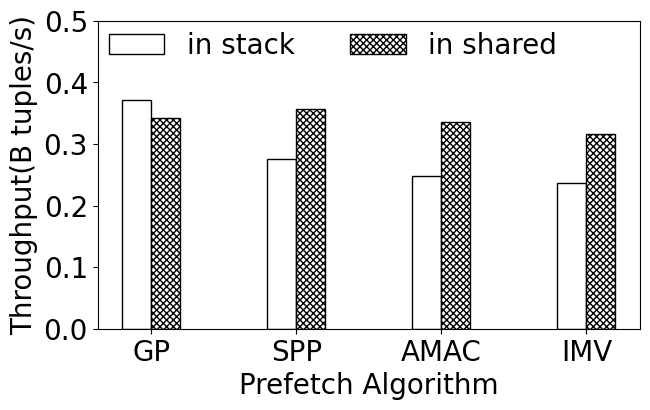

In [29]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
import re

import math
# import pandas as pd


gp = [[] for _ in range(2)]
spp = [[] for _ in range(2)]
amac = [[] for _ in range(2)]
imv = [[] for _ in range(2)]

name = 'Z'

# def my(x):
    # return int(x.split('.')[0].split('_')[1])

for file_path in glob.glob(name + '*.res'):
    if file_path[0] == name:
        print(file_path, end=':\n')
        f = open(file_path, "r")
        shared = bool(file_path.split('.')[0].split('_')[1] == 'shared')
        # test = file_path.split('.')[0].split('_')[2]
        ms = []
        while True:
            a = f.readline()
            tmp = a
            if not a:
                break
            a = a.split(',')
            if len(a) >= 2 and 'probe(S)' in a[0]:
                a = tmp.split('ms')[1].split(' tps ')[0].split(', ')[1]
                # print('\t', a)
                ms.append( float(a) )
        if len(ms) == 5:
            gp[shared].append(float(ms[1]))
            spp[shared].append(float(ms[2]))
            amac[shared].append(float(ms[3]))
            imv[shared].append(float(ms[4]))
            

data_gp = [np.mean(gp[i]) for i in range(2)]
data_spp = [np.mean(spp[i]) for i in range(2)]
data_amac = [np.mean(amac[i]) for i in range(2)]
data_imv = [np.mean(imv[i]) for i in range(2)]


def bar_plot(source, save_path, x_process = lambda x:x):
    width = 0.2
    plt.figure(figsize=(7, 4))
    plt.rc('font', size=20)
    xrange = np.arange(len(source["x"]))
    hatchs = ['', 'xxxxx', '/////', '\\\\\\', 'ooooo', '-----', '+++++'][0:len(source["legends"])]
    for legend, h, i in zip(source["legends"], hatchs, range(0, len(source["legends"]))):
        plt.bar(xrange-(width*len(source["legends"])/2 - width*i - width/2), source['y'][legend], width, edgecolor='k', color='w', hatch=h, label=source["legend_names"][legend])
    
    plt.xticks(xrange, [x_process(i) for i in source["x"]])
    # plt.yticks(fontsize=18)
    plt.legend(loc='upper left', borderaxespad=0, frameon=False,ncol = 2)
    plt.ylabel('Throughput(B tuples/s)')
    plt.ylim(0, 0.5)
    plt.xlabel('Prefetch Algorithm')
    plt.savefig(save_path, bbox_inches='tight')

z = list(zip(data_gp, data_spp, data_amac, data_imv))

A, B = list(z[0]), list(z[1])

import numpy as np

A = list(np.array(A) / (10**9))
B = list(np.array(B) / (10**9))
print(A)
print(B)

data = {
    'x': ["GP", "SPP", "AMAC", "IMV"],
    'y': {
        'A': A,
        'B': B
    },
    'legends': ['A', 'B'],
    'legend_names': {'A': 'in stack', 'B': 'in shared'}
}

# 保存图形
bar_plot(data, 'Figure14.pdf')



data

In [ ]:
# Note: 0, 270568875.2494132, as a line
source = {
 'x': ['GP', 'SPP', 'AMAC', 'IMV'],
 'y': {'A': [0.37105604506635825,
   0.2761041724525849,
   0.2481205271381445,
   0.2365643972744794],
  'B': [0.3426257021980033,
   0.3567949384766596,
   0.3358061062579829,
   0.3158400111215975]},
 'legends': ['A', 'B'],
 'legend_names': {'A': 'in stack', 'B': 'in shared'}
 }